<a href="https://colab.research.google.com/github/EmirErtorer/Data_Analysis_Istanbul_Airbnb/blob/main/Term_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing all necessary libraries for linear regression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from google.colab import files

In [ ]:
upload = files.upload()

Saving listings.csv to listings.csv


In [ ]:
dataset = pd.read_csv('listings.csv')

In [ ]:
dataset.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,4826,The Place,6603,Kaan,NaN,Uskudar,41.05650,29.05367,Entire home/apt,720,1,1,2009-06-01,0.01,1,365
1,20815,The Bosphorus from The Comfy Hill,78838,Gülder,NaN,Besiktas,41.06984,29.04545,Entire home/apt,816,365,41,2018-11-07,0.33,2,279
2,27271,LOVELY APT. IN PERFECT LOCATION,117026,Mutlu,NaN,Beyoglu,41.03254,28.98153,Entire home/apt,233,30,13,2018-05-04,0.19,1,289
3,28277,Duplex Apartment with Terrace,121607,Alen,NaN,Sisli,41.04471,28.98567,Hotel room,761,3,0,NaN,NaN,19,365
4,28318,Cosy home overlooking Bosphorus,121721,Aydin,NaN,Sariyer,41.09048,29.05559,Entire home/apt,823,3,0,NaN,NaN,1,88


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23728 entries, 0 to 23727
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              23728 non-null  int64  
 1   name                            23674 non-null  object 
 2   host_id                         23728 non-null  int64  
 3   host_name                       23727 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   23728 non-null  object 
 6   latitude                        23728 non-null  float64
 7   longitude                       23728 non-null  float64
 8   room_type                       23728 non-null  object 
 9   price                           23728 non-null  int64  
 10  minimum_nights                  23728 non-null  int64  
 11  number_of_reviews               23728 non-null  int64  
 12  last_review                     

In [ ]:
dataset.isna().sum()

,0
id,0
name,54
host_id,0
host_name,1
neighbourhood_group,23728
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0


# **CLEANING THE DATA**
---



In [ ]:
# Checking the number of unique values in column neighbourhood and room type to evaluate one-hot coding effectiveness
print('Number of unique elements in neighbourhood: ', dataset['neighbourhood'].nunique())
print('Elements in neighbourhood: ', sorted(dataset['neighbourhood'].unique()))
print('Number of unique elements in room_type: ', dataset['room_type'].nunique())
print('Elements in room_type: ', sorted(dataset['room_type'].unique()))

Number of unique elements in neighbourhood:  39
Elements in neighbourhood:  ['Adalar', 'Arnavutkoy', 'Atasehir', 'Avcilar', 'Bagcilar', 'Bahcelievler', 'Bakirkoy', 'Basaksehir', 'Bayrampasa', 'Besiktas', 'Beykoz', 'Beylikduzu', 'Beyoglu', 'Buyukcekmece', 'Catalca', 'Cekmekoy', 'Esenler', 'Esenyurt', 'Eyup', 'Fatih', 'Gaziosmanpasa', 'Gungoren', 'Kadikoy', 'Kagithane', 'Kartal', 'Kucukcekmece', 'Maltepe', 'Pendik', 'Sancaktepe', 'Sariyer', 'Sile', 'Silivri', 'Sisli', 'Sultanbeyli', 'Sultangazi', 'Tuzla', 'Umraniye', 'Uskudar', 'Zeytinburnu']
Number of unique elements in room_type:  4
Elements in room_type:  ['Entire home/apt', 'Hotel room', 'Private room', 'Shared room']


In [ ]:
# Converting the column datatypes
dataset['last_review'] = pd.to_datetime(dataset['last_review'])
dataset['days_since_last_review'] = (pd.to_datetime('today') - dataset['last_review']).dt.days # Creating a new feature
dataset['days_since_last_review'] = dataset['days_since_last_review'].fillna(9999)

dataset = pd.get_dummies(dataset, columns=['neighbourhood'], drop_first=True)
dataset = pd.get_dummies(dataset, columns=['room_type'], drop_first=True)

In [ ]:
# Dropping the irrelevant columns
dataset.drop(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'latitude', 'longitude', 'last_review'], axis=1, inplace=True)
dataset.info() # confirming column removal

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23728 entries, 0 to 23727
Data columns (total 48 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   price                           23728 non-null  int64  
 1   minimum_nights                  23728 non-null  int64  
 2   number_of_reviews               23728 non-null  int64  
 3   reviews_per_month               11353 non-null  float64
 4   calculated_host_listings_count  23728 non-null  int64  
 5   availability_365                23728 non-null  int64  
 6   days_since_last_review          23728 non-null  float64
 7   neighbourhood_Arnavutkoy        23728 non-null  bool   
 8   neighbourhood_Atasehir          23728 non-null  bool   
 9   neighbourhood_Avcilar           23728 non-null  bool   
 10  neighbourhood_Bagcilar          23728 non-null  bool   
 11  neighbourhood_Bahcelievler      23728 non-null  bool   
 12  neighbourhood_Bakirkoy          

In [ ]:
# removing the NaN values from reviews_per_month
dataset['reviews_per_month'] = dataset['reviews_per_month'].fillna(0)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23728 entries, 0 to 23727
Data columns (total 48 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   price                           23728 non-null  int64  
 1   minimum_nights                  23728 non-null  int64  
 2   number_of_reviews               23728 non-null  int64  
 3   reviews_per_month               23728 non-null  float64
 4   calculated_host_listings_count  23728 non-null  int64  
 5   availability_365                23728 non-null  int64  
 6   days_since_last_review          23728 non-null  float64
 7   neighbourhood_Arnavutkoy        23728 non-null  bool   
 8   neighbourhood_Atasehir          23728 non-null  bool   
 9   neighbourhood_Avcilar           23728 non-null  bool   
 10  neighbourhood_Bagcilar          23728 non-null  bool   
 11  neighbourhood_Bahcelievler      23728 non-null  bool   
 12  neighbourhood_Bakirkoy          

In [ ]:
dataset.head()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,days_since_last_review,neighbourhood_Arnavutkoy,neighbourhood_Atasehir,neighbourhood_Avcilar,...,neighbourhood_Sisli,neighbourhood_Sultanbeyli,neighbourhood_Sultangazi,neighbourhood_Tuzla,neighbourhood_Umraniye,neighbourhood_Uskudar,neighbourhood_Zeytinburnu,room_type_Hotel room,room_type_Private room,room_type_Shared room
0,720,1,1,0.01,1,365,5845.0,False,False,False,...,False,False,False,False,False,True,False,False,False,False
1,816,365,41,0.33,2,279,2399.0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,233,30,13,0.19,1,289,2586.0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,761,3,0,0.00,19,365,9999.0,False,False,False,...,True,False,False,False,False,False,False,True,False,False
4,823,3,0,0.00,1,88,9999.0,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# **Analyzing Features (Outlier Detection and Feature Selection)**
---



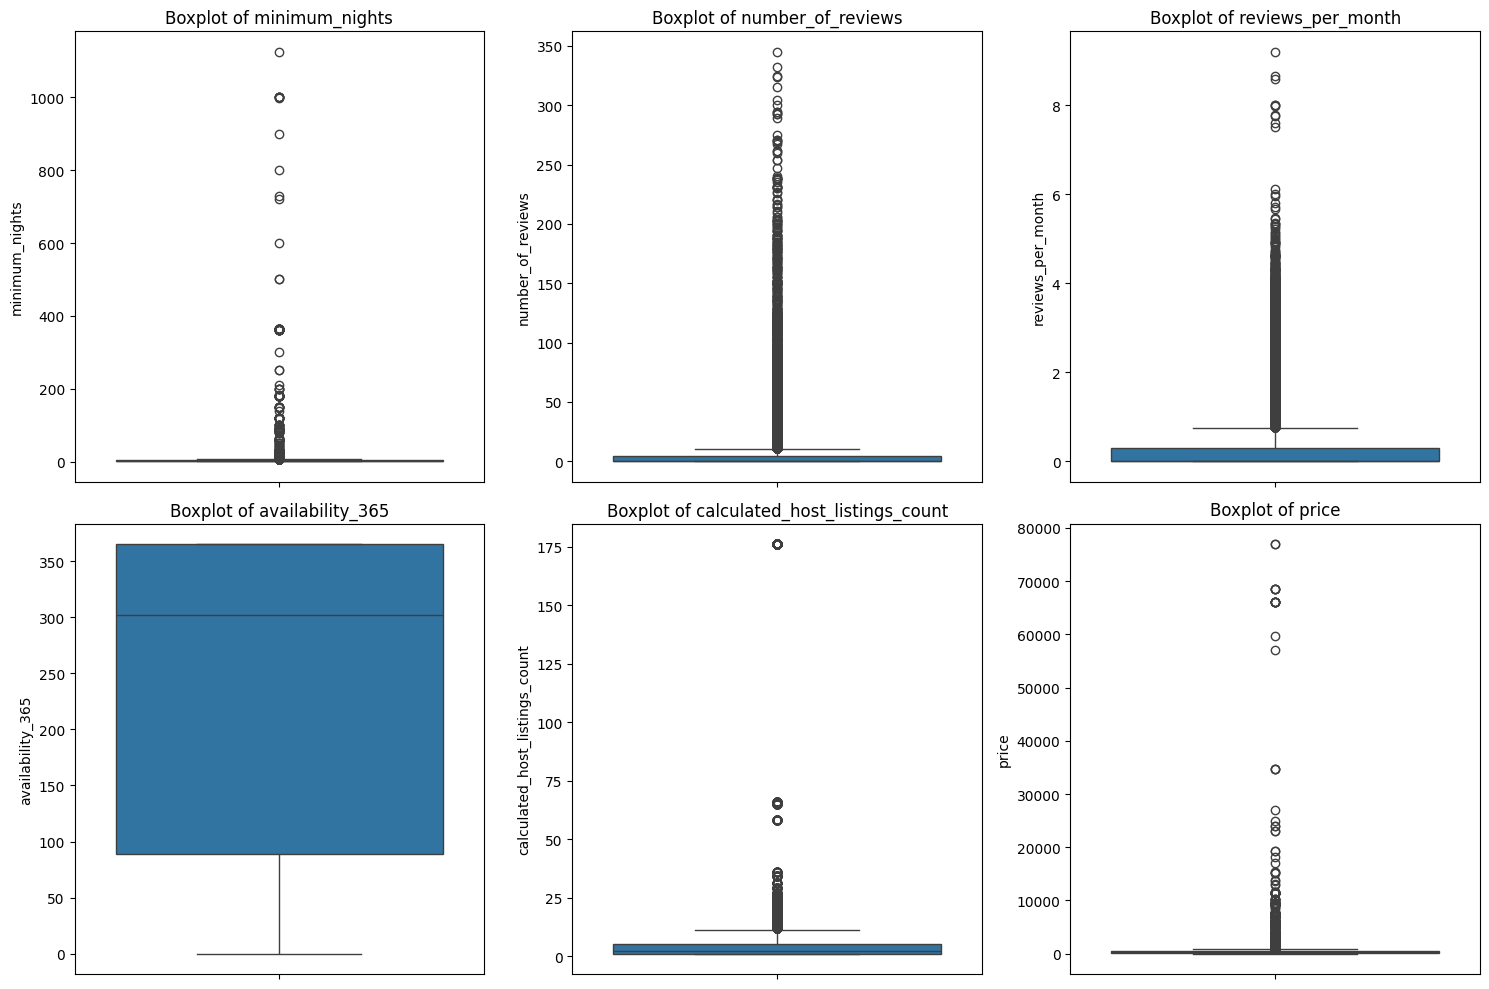

In [ ]:
num_cols = ['minimum_nights', 'number_of_reviews', 'reviews_per_month', 'availability_365', 'calculated_host_listings_count', 'price']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10)) # 2x3 grid of subplots
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(data=dataset, y=col, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

# using tight layout for spacing
plt.tight_layout()
plt.show()

**minimum_nights column**


---



<Axes: >

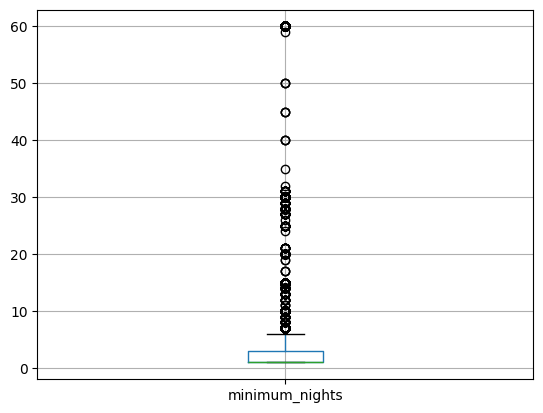

In [ ]:
# Clipping the colum at 60 to avoid distortions
dataset['minimum_nights'] = dataset['minimum_nights'].clip(upper=60)
dataset.boxplot(column=['minimum_nights'])

**number_of_reviews column**

---



In [ ]:
# Checking the 95th and 99th percentile to determine a capping number for reviews
dataset['number_of_reviews'].describe(percentiles=[0.95, 0.99])

,number_of_reviews
count,23728.000000
mean,7.870828
std,23.229127
min,0.000000
50%,0.000000
95%,43.000000
99%,119.000000
max,345.000000


<Axes: >

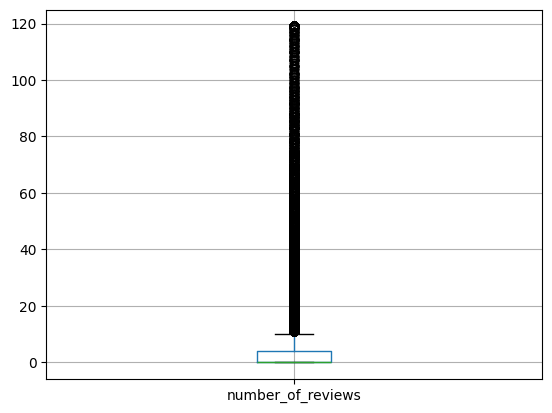

In [ ]:
# Clipping the column at 119 (99th percentile) to avoid distortion
dataset['number_of_reviews'] = dataset['number_of_reviews'].clip(upper=119)
dataset.boxplot(column=['number_of_reviews'])

**reviews_per_month column**

---


In [ ]:
# Checking the 95th and 99th percentile to determine a capping number for reviews
dataset['reviews_per_month'].describe(percentiles=[0.95, 0.99])

,reviews_per_month
count,23728.000000
mean,0.339794
std,0.718269
min,0.000000
50%,0.000000
95%,1.880000
99%,3.520000
max,9.200000


<Axes: >

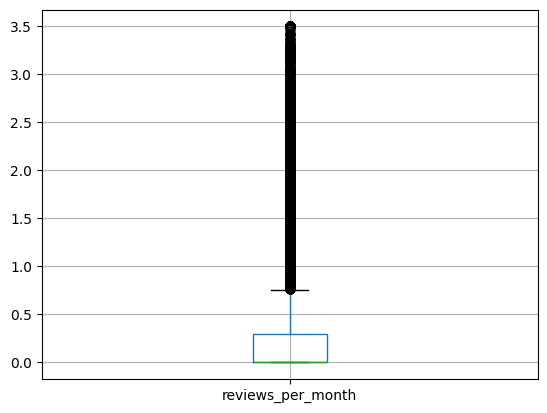

In [ ]:
# Clipping the column at 3.5 (99th percentile) to avoid distortion
dataset['reviews_per_month'] = dataset['reviews_per_month'].clip(upper=3.5)
dataset.boxplot(column=['reviews_per_month'])

**calculated_host_listings_count column**


---



In [ ]:
# Calculating IQR for 'calculated_host_listings_count'
IQR_listings = dataset['calculated_host_listings_count'].quantile(0.75) - dataset['calculated_host_listings_count'].quantile(0.25)
print('IQR: ', IQR_listings)

# Determining upper limit for outliers
upper_limit_listings = dataset['calculated_host_listings_count'].quantile(0.75) + 1.5 * IQR_listings
print('Upper Limit: ', upper_limit_listings)

# Identifying outliers
outliers_listings = dataset[dataset['calculated_host_listings_count'] > upper_limit_listings]
print('\nOutliers:\n----------------------------')
outliers_listings

IQR:  4.0
Upper Limit:  11.0

Outliers:
----------------------------


,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,days_since_last_review,neighbourhood_Arnavutkoy,neighbourhood_Atasehir,neighbourhood_Avcilar,...,neighbourhood_Sisli,neighbourhood_Sultanbeyli,neighbourhood_Sultangazi,neighbourhood_Tuzla,neighbourhood_Umraniye,neighbourhood_Uskudar,neighbourhood_Zeytinburnu,room_type_Hotel room,room_type_Private room,room_type_Shared room
3,761,3,0,0.00,19,365,9999.0,False,False,False,...,True,False,False,False,False,False,False,True,False,False
31,686,3,75,0.74,14,350,1951.0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
70,171,60,83,0.78,15,365,1924.0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
89,96,4,119,3.24,16,0,1904.0,False,False,False,...,False,False,False,False,False,False,False,False,True,False
90,96,2,14,0.14,16,180,1914.0,False,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23644,1001,1,0,0.00,15,364,9999.0,False,False,False,...,True,False,False,False,False,False,False,False,False,False
23658,178,1,0,0.00,13,364,9999.0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
23659,240,1,0,0.00,13,365,9999.0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
23718,357,3,0,0.00,29,364,9999.0,False,False,False,...,False,False,False,False,False,False,False,False,False,False


<Axes: >

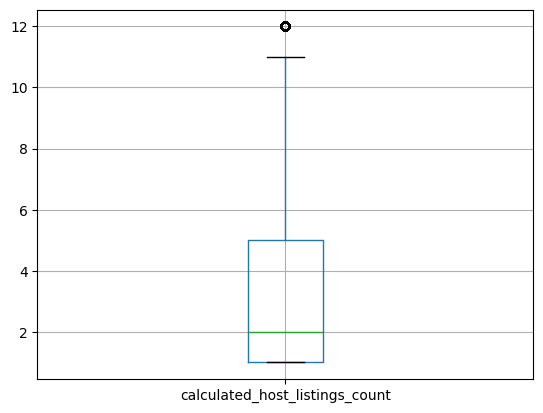

In [ ]:
# Replacing extreme 'calculated_host_listings_count' values(above upper_limit_listings) with the 90th percentile value
dataset['calculated_host_listings_count'] = np.where(dataset['calculated_host_listings_count'] > upper_limit_listings, dataset['calculated_host_listings_count'].quantile(0.90), dataset['calculated_host_listings_count'])
dataset.boxplot(column=['calculated_host_listings_count'])

**price column**


---



In [ ]:
# Checking the 95th and 99th percentile to determine a capping number for price
dataset['price'].describe(percentiles=[0.95, 0.99])

,price
count,23728.000000
mean,484.643248
std,1973.884093
min,0.000000
50%,247.000000
95%,1152.000000
99%,3847.000000
max,76922.000000


In [ ]:
price_cap = dataset['price'].quantile(0.99)
dataset['price'] = dataset['price'].clip(upper=price_cap)

<Axes: >

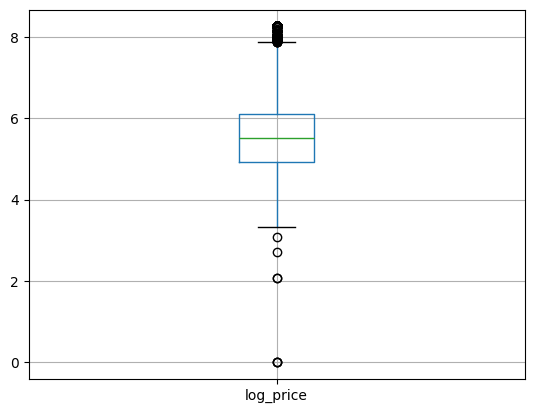

In [ ]:
# Applying log transformation to compress the skewed price distribution
dataset['log_price'] = np.log1p(dataset['price'])
dataset.boxplot(column=['log_price'])

In [ ]:
# Reordering the column orders in the dataset
cols = list(dataset.columns)
cols.remove('price') # removing price from its current position
# Inserting 'price' right after log_price
log_price_index = cols.index('log_price')
cols.insert(log_price_index + 1, 'price')
dataset = dataset[cols]

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23728 entries, 0 to 23727
Data columns (total 49 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   minimum_nights                  23728 non-null  int64  
 1   number_of_reviews               23728 non-null  int64  
 2   reviews_per_month               23728 non-null  float64
 3   calculated_host_listings_count  23728 non-null  float64
 4   availability_365                23728 non-null  int64  
 5   days_since_last_review          23728 non-null  float64
 6   neighbourhood_Arnavutkoy        23728 non-null  bool   
 7   neighbourhood_Atasehir          23728 non-null  bool   
 8   neighbourhood_Avcilar           23728 non-null  bool   
 9   neighbourhood_Bagcilar          23728 non-null  bool   
 10  neighbourhood_Bahcelievler      23728 non-null  bool   
 11  neighbourhood_Bakirkoy          23728 non-null  bool   
 12  neighbourhood_Basaksehir        

**Final Outlier Check**


---



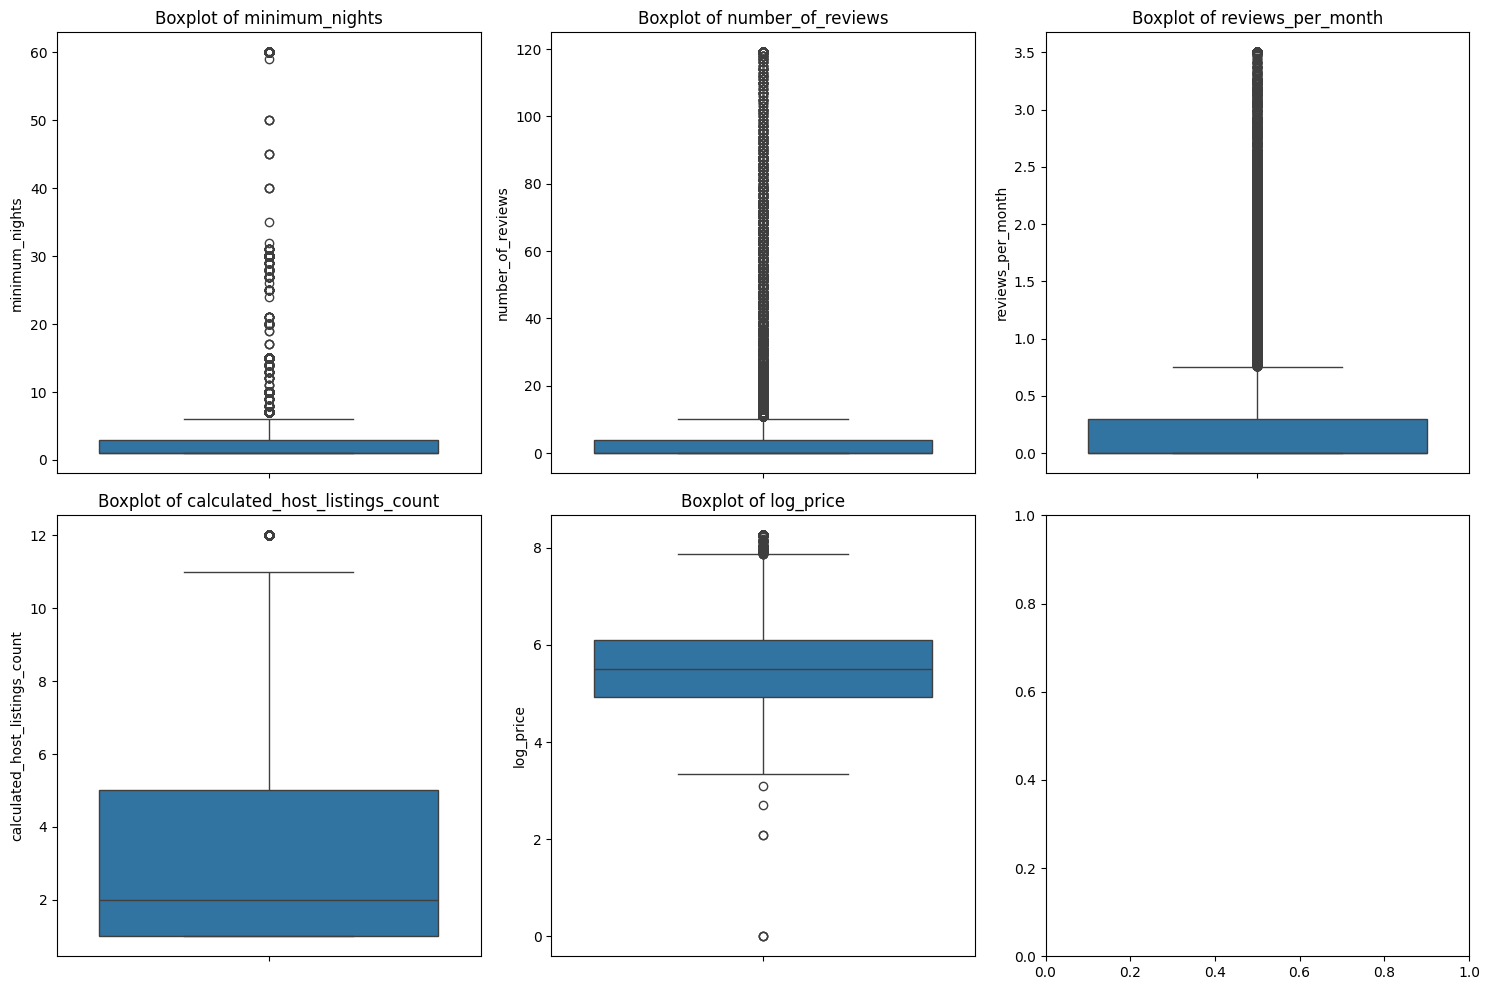

In [ ]:
num_cols = ['minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'log_price']

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10)) # 2x3 grid of subplots
axes = axes.flatten()

for i, col in enumerate(num_cols):
    sns.boxplot(data=dataset, y=col, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

# using tight layout for spacing
plt.tight_layout()
plt.show()



---



# **Model Training and Testing**


---



**Linear Regression**


------





In [ ]:
# Extracting feature matrix x and target vector y.
x = dataset.drop(columns=['log_price', 'price'])
print(x.shape)
y = dataset['log_price'] # target colum
print(y.shape)

(23728, 47)
(23728,)


In [ ]:
# train-test-split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=42)
print(x_test.shape)
print(x_train.shape)
x_sample = x_train.sample(5000, random_state=42)
y_sample = y_train.loc[x_sample.index]

(2373, 47)
(21355, 47)


In [ ]:
# Defining shared pipeline steps except final model
shared_steps = [
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures())
]

# defining models to test
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso()
}

# Shared param grid for all (except model specific hyperparameters)
shared_params = {
    'poly__degree': [1, 2],
    'regressor__fit_intercept': [True, False]
}

# model specific parameters
ridge_params = {'regressor__alpha': np.logspace(-4, 2, 10)}
lasso_params = {'regressor__alpha': np.logspace(-4, 2, 10)}

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import gc

# Storing results
results = {}

for name, model in models.items():
    print(f"\nRunning GridSearchCV for {name}...")

    # Trigger garbage collection before each model to clear unused memory
    gc.collect()

    # Building pipeline
    pipeline = Pipeline(shared_steps + [('regressor', model)])

    # Creating combined param grid
    param_grid = dict(shared_params)
    if name == 'Ridge':
        param_grid.update(ridge_params)
    elif name == 'Lasso':
        param_grid.update(lasso_params)

    # Grid search
    grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2', n_jobs=-1)
    grid.fit(x_train, y_train)

    print(f"Best params for {name}: {grid.best_params_}")
    print(f"Best R² score on CV: {grid.best_score_:.4f}")

    # Saving the best model and testing performance
    model = grid.best_estimator_
    y_pred = model.predict(x_test)
    r2 = model.score(x_test, y_test)
    results[name] = {'model': model, 'R²': r2}


Running GridSearchCV for LinearRegression...
Best params for LinearRegression: {'poly__degree': 1, 'regressor__fit_intercept': True}
Best R² score on CV: 0.3166

Running GridSearchCV for Ridge...
Best params for Ridge: {'poly__degree': 2, 'regressor__alpha': np.float64(100.0), 'regressor__fit_intercept': True}
Best R² score on CV: 0.3361

Running GridSearchCV for Lasso...
Best params for Lasso: {'poly__degree': 2, 'regressor__alpha': np.float64(0.002154434690031882), 'regressor__fit_intercept': True}
Best R² score on CV: 0.3503


In [ ]:
# Comparing the final R^2 on test set
print("\nFinal R² scores on test set:")
for model_name, res in results.items():
    print(f"{model_name}: R² = {res['R²']:.4f}")


Final R² scores on test set:
LinearRegression: R² = 0.3370
Ridge: R² = 0.3675
Lasso: R² = 0.3774


**Random Forest**


---



In [ ]:
from sklearn.ensemble import RandomForestRegressor # importing the model

In [ ]:
# Setting up pipeline and hyperparameters
rf_pipeline = Pipeline([
    ('regressor', RandomForestRegressor(random_state=42))
])

param_grid_rf = {
    'regressor__n_estimators': [100, 200],
    'regressor__max_depth': [10, 20, None],
    'regressor__min_samples_split': [2, 5],
    'regressor__min_samples_leaf': [1, 2, 4],
}

In [ ]:
# Runring grid search
rf_grid = GridSearchCV(rf_pipeline, param_grid=param_grid_rf, cv=5, scoring='r2', n_jobs=-1)

# Fitting the model
rf_grid.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('regressor',
                                        RandomForestRegressor(random_state=42))]),
             n_jobs=-1,
             param_grid={'regressor__max_depth': [10, 20, None],
                         'regressor__min_samples_leaf': [1, 2, 4],
                         'regressor__min_samples_split': [2, 5],
                         'regressor__n_estimators': [100, 200]},
             scoring='r2')

In [ ]:
# Evaluating results
best_rf = rf_grid.best_estimator_
print("Best RF Params:", rf_grid.best_params_)
print("Random Forest R² on Test Set:", best_rf.score(x_test, y_test))


Best RF Params: {'regressor__max_depth': 20, 'regressor__min_samples_leaf': 4, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 200}
Random Forest R² on Test Set: 0.40714732071269055


# **Visualizations**


---



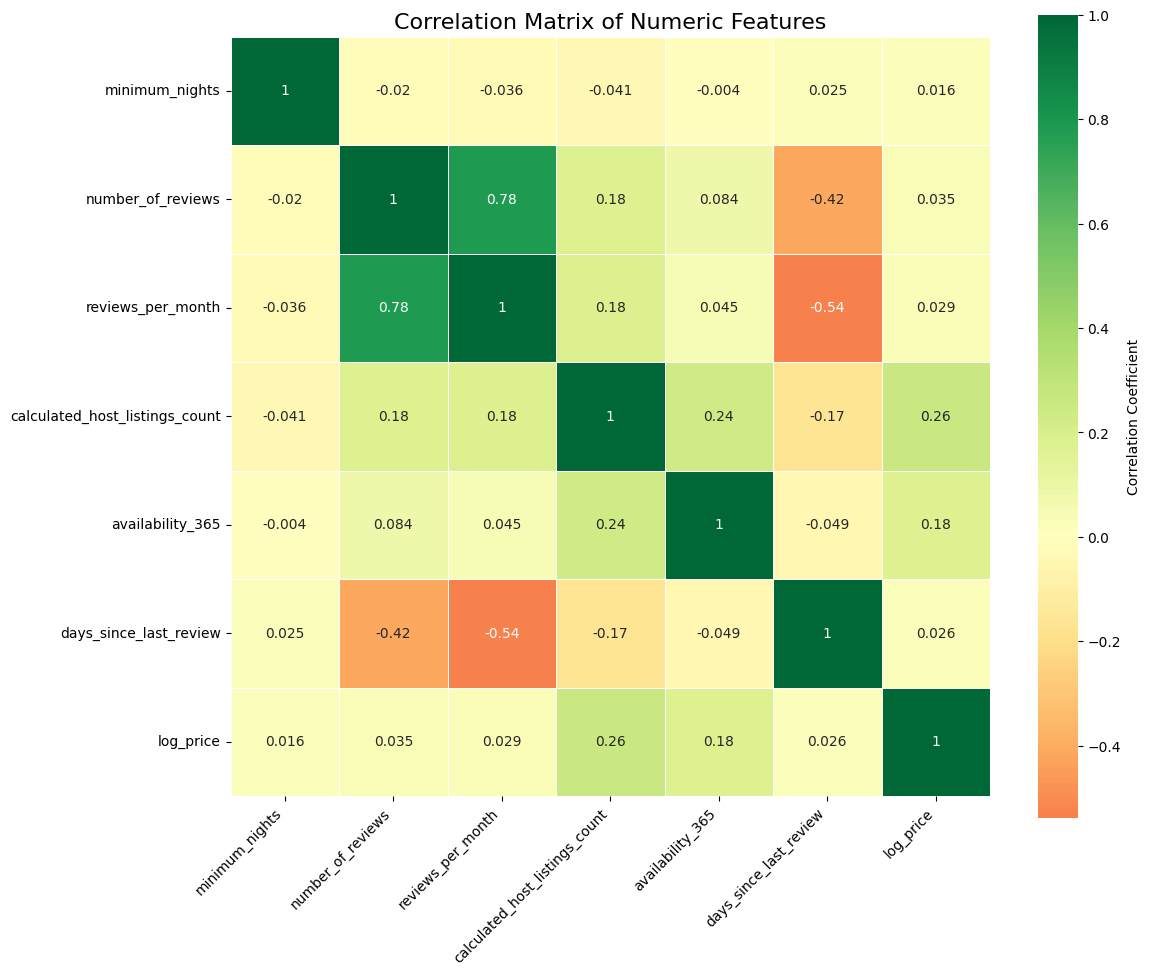

In [ ]:
#Selecting only numeric features
numeric_data = dataset.select_dtypes(include=['int64', 'float64']).drop(columns=['price'])

# computing full correlation matrix
corr_matrix = numeric_data.corr()

# Plotting full heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='RdYlGn',
    center=0,
    square=True,
    linewidths=0.5,
    cbar_kws={'label': 'Correlation Coefficient'}
)
plt.title("Correlation Matrix of Numeric Features", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


<ipython-input-30-eef9292dff44>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=room_type_counts.index, y=room_type_counts.values, palette='Set2')


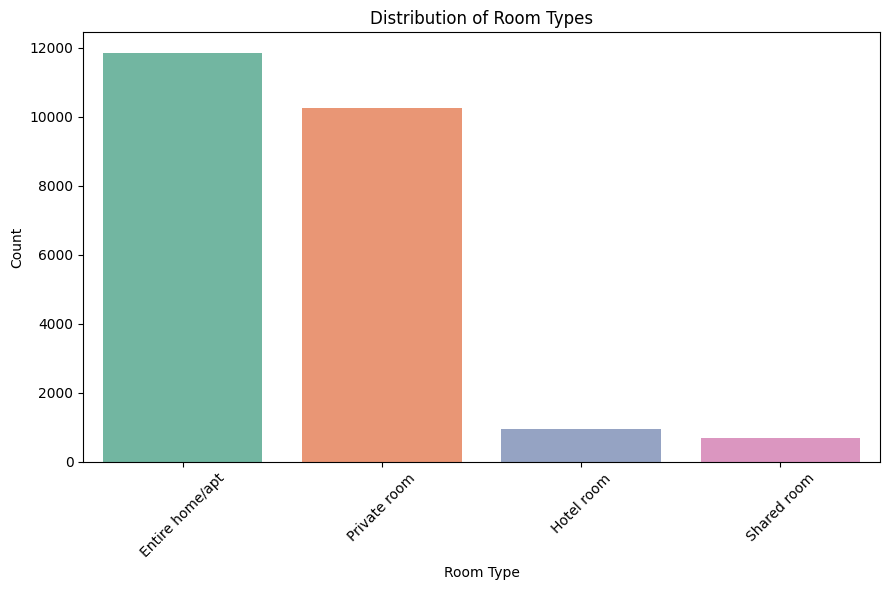

In [ ]:
# Reconstructing original room_type from one-hot columns
def reconstruct_room_type(row):
    if row.get('room_type_Hotel room', 0) == 1:
        return 'Hotel room'
    elif row.get('room_type_Private room', 0) == 1:
        return 'Private room'
    elif row.get('room_type_Shared room', 0) == 1:
        return 'Shared room'
    else:
        return 'Entire home/apt'  # Implied baseline class from one-hot encoding

# Applying reconstruction
dataset['room_type_reconstructed'] = dataset.apply(reconstruct_room_type, axis=1)

# Counting occurrences of each room type
room_type_counts = dataset['room_type_reconstructed'].value_counts()

# Plot
plt.figure(figsize=(9, 6))
sns.barplot(x=room_type_counts.index, y=room_type_counts.values, palette='Set2')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.title('Distribution of Room Types')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-32-dcd3780fb9bc>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_price_series.index, y=avg_price_series.values, palette='Set2')


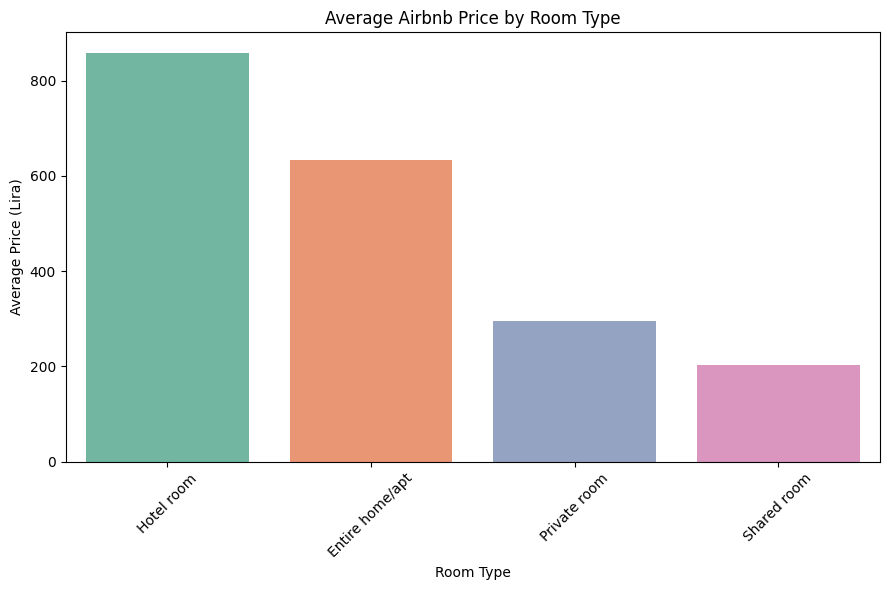

In [ ]:
# Reconstructing original room_type from one-hot columns
def reconstruct_room_type(row):
    if row.get('room_type_Hotel room', 0) == 1:
        return 'Hotel room'
    elif row.get('room_type_Private room', 0) == 1:
        return 'Private room'
    elif row.get('room_type_Shared room', 0) == 1:
        return 'Shared room'
    else:
        return 'Entire home/apt'  # The dropped baseline category

# Creating a new column
dataset['room_type_reconstructed'] = dataset.apply(reconstruct_room_type, axis=1)

# Calculating average price by reconstructed room type
avg_price_series = dataset.groupby('room_type_reconstructed')['price'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(9, 6))
sns.barplot(x=avg_price_series.index, y=avg_price_series.values, palette='Set2')
plt.xlabel('Room Type')
plt.ylabel('Average Price (Lira)')
plt.title('Average Airbnb Price by Room Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<ipython-input-64-b952f4f5da6a>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=neighbourhood_counts.index, y=neighbourhood_counts.values, palette='coolwarm')


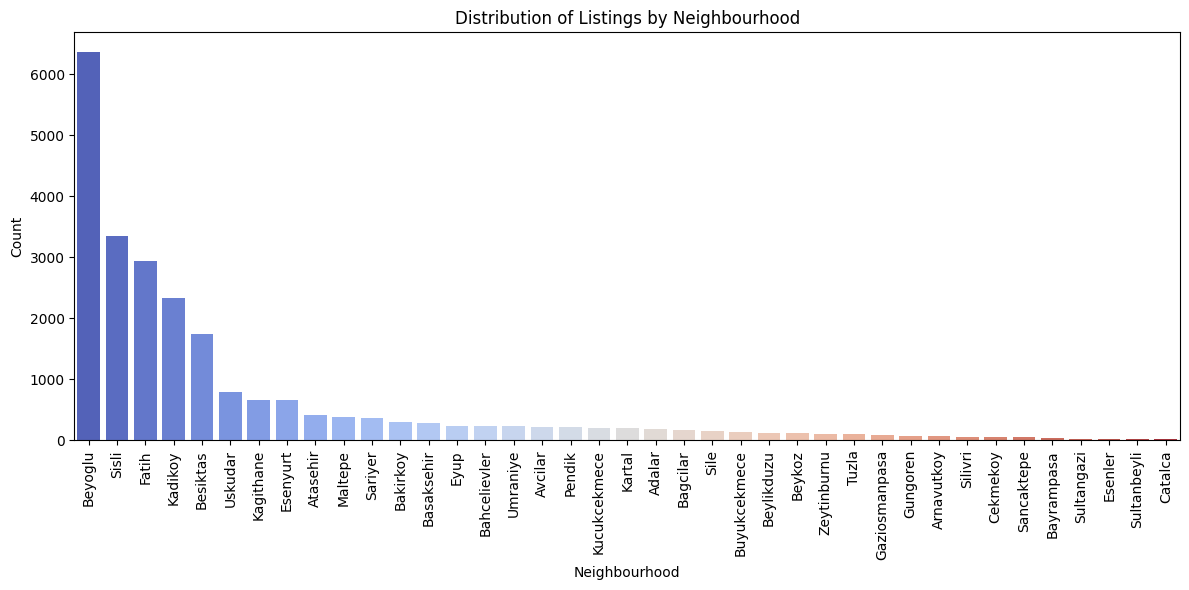

In [ ]:
# Identifying one-hot encoded neighbourhood columns
neighbourhood_columns = [col for col in dataset.columns if col.startswith('neighbourhood_')]

# Calculating counts for each neighbourhood
neighbourhood_counts = dataset[neighbourhood_columns].sum()

# Adding base neighbourhood 'Adalar' manually
adalar_count = len(dataset) - neighbourhood_counts.sum()
neighbourhood_counts['Adalar'] = adalar_count

# Sort values
neighbourhood_counts = neighbourhood_counts.sort_values(ascending=False)

# Cleaning index names
neighbourhood_counts.index = [col.replace('neighbourhood_', '') if col != 'Adalar' else col for col in neighbourhood_counts.index]

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=neighbourhood_counts.index, y=neighbourhood_counts.values, palette='coolwarm')
plt.xlabel('Neighbourhood')
plt.ylabel('Count')
plt.title('Distribution of Listings by Neighbourhood')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


<ipython-input-76-3506143d5b4a>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(avg_prices.keys()), y=list(avg_prices.values()), palette='coolwarm')


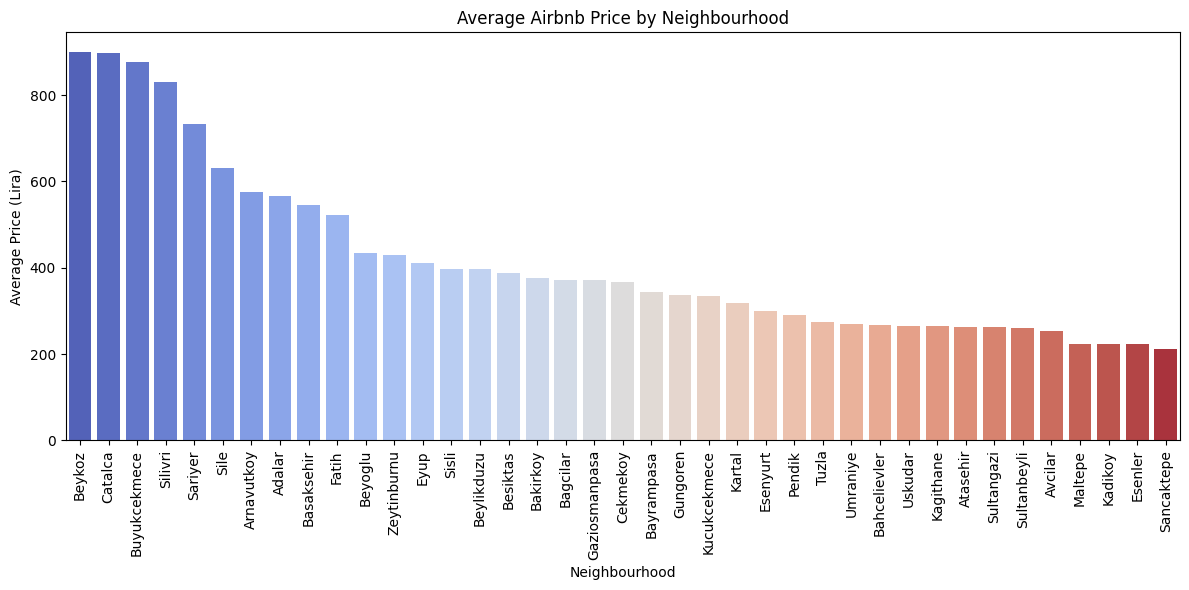

In [ ]:
# Identifying one-hot encoded neighbourhood columns
neighbourhood_columns = [col for col in dataset.columns if col.startswith('neighbourhood_')]

# Calculating weighted average price per one-hot encoded neighbourhood
avg_prices = {}
for col in neighbourhood_columns:
    count = dataset[col].sum()
    total_price = (dataset[col] * dataset['price']).sum()
    avg_prices[col.replace('neighbourhood_', '')] = total_price / count if count > 0 else 0

# Manually computing Adalar average price (base category)
# Adalar rows are the ones where all one-hot neighbourhoods are 0
adalar_mask = (dataset[neighbourhood_columns].sum(axis=1) == 0)
adalar_count = adalar_mask.sum()
adalar_total = dataset.loc[adalar_mask, 'price'].sum()
avg_prices['Adalar'] = adalar_total / adalar_count if adalar_count > 0 else 0

# Sorting by average price descending
avg_prices = dict(sorted(avg_prices.items(), key=lambda x: x[1], reverse=True))

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=list(avg_prices.keys()), y=list(avg_prices.values()), palette='coolwarm')
plt.xticks(rotation=90)
plt.xlabel('Neighbourhood')
plt.ylabel('Average Price (Lira)')
plt.title('Average Airbnb Price by Neighbourhood')
plt.tight_layout()
plt.show()


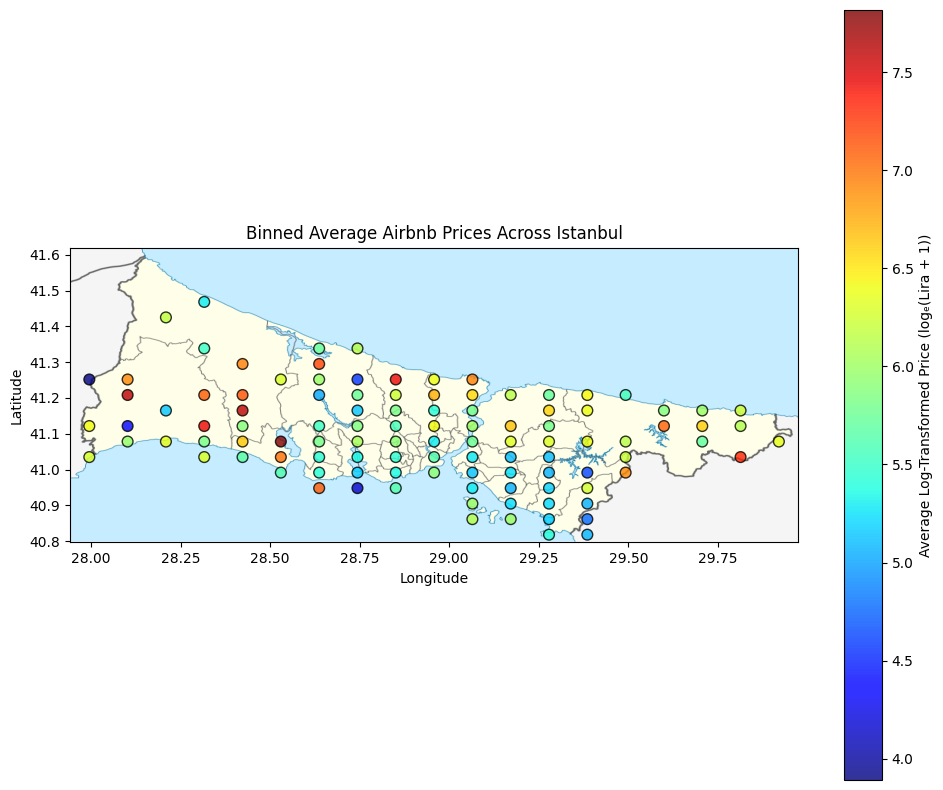

In [ ]:
import urllib.request

# loading the full original dataset
full_dataset = pd.read_csv('listings.csv')

# Creating a copy because i had removed latitude and longitude
geo_dataset = dataset.copy()
geo_dataset['latitude'] = full_dataset.loc[geo_dataset.index, 'latitude']
geo_dataset['longitude'] = full_dataset.loc[geo_dataset.index, 'longitude']
geo_dataset['price'] = full_dataset.loc[geo_dataset.index, 'price']

# dropping rows with missing info
geo_dataset.dropna(subset=['latitude', 'longitude', 'price'], inplace=True)

if 'log_price' not in geo_dataset.columns:
    geo_dataset['log_price'] = np.log1p(geo_dataset['price'])

# Mapping geographic bounds that i got from the image metadata
left, right = 27.941666, 29.973888
bottom, top = 40.796666, 41.619888

# Loading the Istanbul map image
img_url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/c/cf/Turkey_Istanbul_location_map.svg/960px-Turkey_Istanbul_location_map.svg.png?20180406172645'
img = plt.imread(urllib.request.urlopen(img_url), format='jpg')

# Binning latitude and longitude into grid cells
lat_bins = np.linspace(bottom, top, 20)
lon_bins = np.linspace(left, right, 20)

lat_inds = np.digitize(geo_dataset['latitude'], lat_bins)
lon_inds = np.digitize(geo_dataset['longitude'], lon_bins)

geo_dataset['bin'] = list(zip(lat_inds, lon_inds))

# Calculating mean log_price per grid cell
bin_avg_price = geo_dataset.groupby('bin')['log_price'].mean()

#getting bin center coordinates
bin_centers = {
    bin_key: (
        (lat_bins[bin_key[0] - 1] + lat_bins[bin_key[0]]) / 2,
        (lon_bins[bin_key[1] - 1] + lon_bins[bin_key[1]]) / 2
    )
    for bin_key in bin_avg_price.index
}

# Preparing data for plotting
lats = [bin_centers[b][0] for b in bin_avg_price.index]
lons = [bin_centers[b][1] for b in bin_avg_price.index]
prices = bin_avg_price.values

# Plotting
plt.figure(figsize=(10, 8))
plt.imshow(img, extent=[left, right, bottom, top], zorder=0)

sc = plt.scatter(
    lons,
    lats,
    c=prices,
    cmap='jet',
    alpha=0.8,
    edgecolors='k',
    zorder=5,
    s=60
)

plt.colorbar(sc, label='Average Log-Transformed Price (logₑ(Lira + 1))')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Binned Average Airbnb Prices Across Istanbul')
plt.grid(False)
plt.tight_layout()
plt.show()

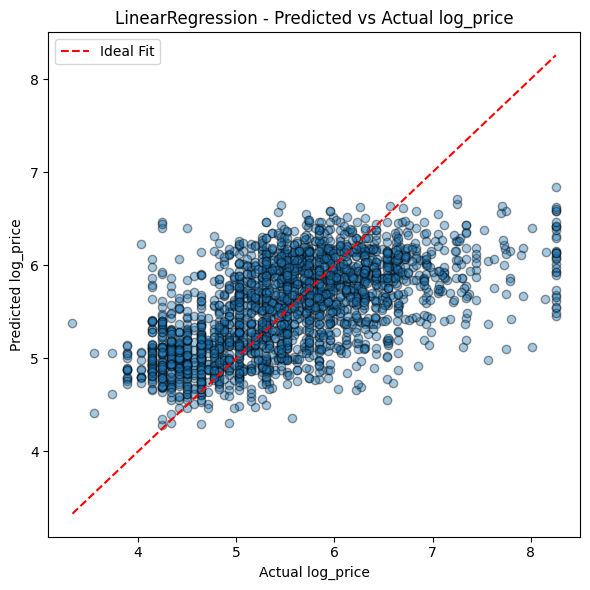

In [ ]:
# 'Lasso', 'Ridge', or 'LinearRegression'
selected_model_name = 'LinearRegression'  # change this to try others

# Getting the model from results dictionary
selected_model = results[selected_model_name]['model']

# Predicting on test set
y_pred = selected_model.predict(x_test)

# Plotting predicted vs actual log_price
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.4, edgecolors='k')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label='Ideal Fit')

plt.xlabel('Actual log_price')
plt.ylabel('Predicted log_price')
plt.title(f'{selected_model_name} - Predicted vs Actual log_price')
plt.legend()
plt.tight_layout()
plt.show()


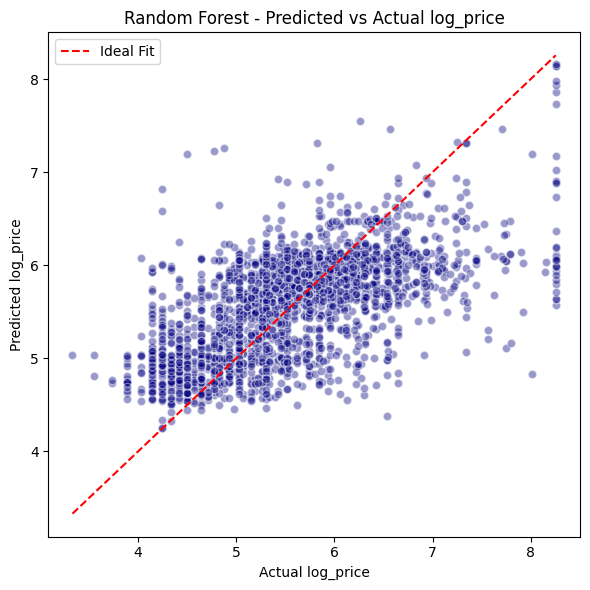

In [ ]:
# getting predictions on test set
y_pred_rf = best_rf.predict(x_test)

# Plot
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.4, color='navy', edgecolors='white')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r--', label='Ideal Fit')
plt.xlabel('Actual log_price')
plt.ylabel('Predicted log_price')
plt.title('Random Forest - Predicted vs Actual log_price')
plt.legend()
plt.tight_layout()
plt.show()
